In [1]:
%matplotlib inline
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Basic info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Info:")
df.info()


🔹 Dataset Shape: (7043, 21)

🔹 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

In [3]:
# Check missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())



🔹 Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


superficially — par yahi to trap hai!
Dekh clearly:
df['TotalCharges'].isnull().sum()  # gives 0 ❌

But jab column object type hai, to "" (blank string) bhi valid non-null mana jata hai!
Iska matlab: .isnull() unko detect nahi karega!

In [4]:
# so we have to change strings into numbers
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce') #errors='coerce' – Magic Part
#to_numeric ma values ko numeric(int,float) me convert karne ki koshish karega.
#Agar koi value numeric me convert nahi hoti, to usko NaN bana do.

In [5]:
# now check this too:
print("\n🔹 Missing Values After Conversion: ",end="")
print(df["TotalCharges"].isnull().sum())


🔹 Missing Values After Conversion: 11


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.drop("customerID", axis=1, inplace=True)

In [8]:
missing=df["TotalCharges"].isnull().sum()
total=df.shape[0]
missing_percentage=missing/total*100
print(f"missing % is {missing_percentage:.2f}%")

missing % is 0.16%


In [9]:
df.shape

(7043, 20)

In [10]:
from sklearn.impute import KNNImputer
numeric_columns=df.select_dtypes(include=['int64', 'float64']).columns
Knn_imputer=KNNImputer(n_neighbors=5)
df[numeric_columns]=Knn_imputer.fit_transform(df[numeric_columns])

In [11]:
# check again for missing values
print("\n🔹 Missing Values After Imputation: ")
print(df.isnull().sum())


🔹 Missing Values After Imputation: 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Step 1: Column Classification — Categorical vs Numerical

In [12]:
# Separate categorical and numerical columns
categorical_columns=df.select_dtypes(include=["object"]).columns
numerical_columns=df.select_dtypes(include=["int64", "float64"]).columns

In [13]:
print("\n🔹 Categorical Columns:",categorical_columns.to_list())
print("\n🔹 Numerical Columns:",numerical_columns.to_list())


🔹 Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

🔹 Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# EDA

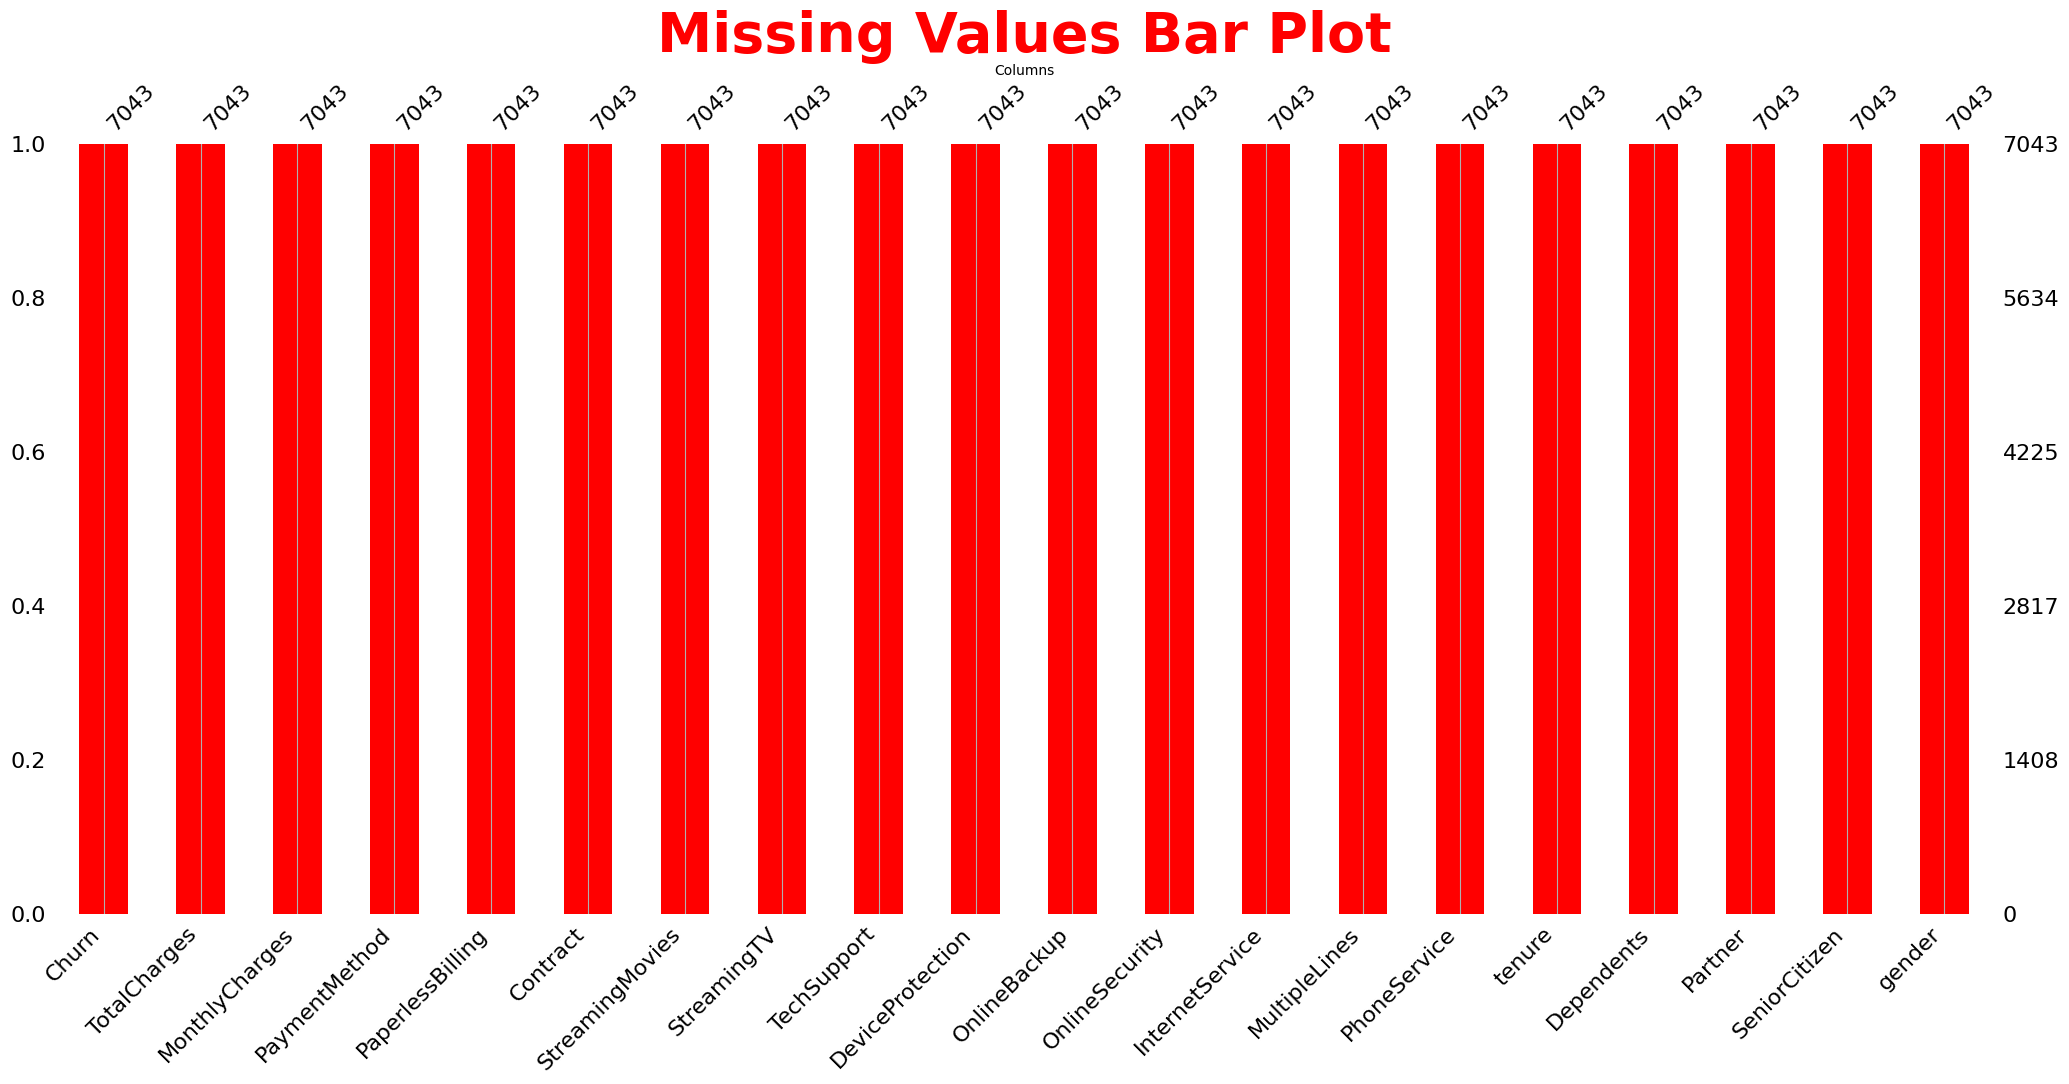

In [14]:
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
msno.bar(df,color="red",sort="descending")
plt.title("Missing Values Bar Plot", fontsize=40, color="red", fontweight="bold")
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Non-Null Count", fontsize=16)
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21676\2241970243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette='Set2')


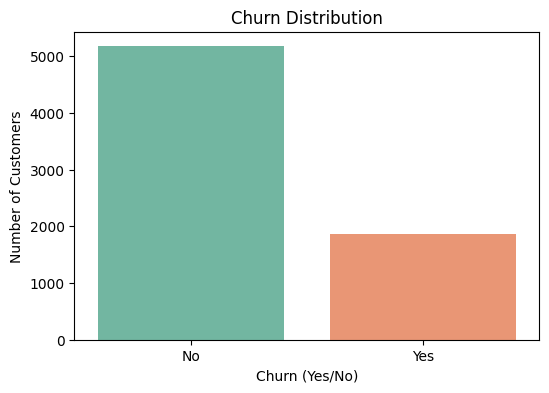

🔹 Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Number of Customers")
plt.show()

# Percentage of churned customers
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print("🔹 Churn Rate:\n", churn_rate)


In [16]:
df.shape #iska  matlav ha ki hmara pass total 20 columns ha

(7043, 20)

# Encoding

In [17]:
categorical_columns=df.select_dtypes(include=["object"]).columns
print("\n🔹 Categorical Columns:",categorical_columns.to_list())
df[categorical_columns].shape #iska matlab hai ki humare paas 16 categorical columns hain


🔹 Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


(7043, 16)

In [18]:
numerical_columns=df.select_dtypes(include=["int64", "float64"]).columns
print("\n🔹 Numerical Columns:",numerical_columns.to_list())
print(df[numerical_columns].shape) #isaka matlab hai ki humare paas 4 numerical columns hain, and previously we have 16 categorical columns, toatl is 16+4=20, which is correct
df[numerical_columns]


🔹 Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
(7043, 4)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


In [19]:
print(df.shape)
df

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
categorical_encoded=pd.get_dummies(df[categorical_columns],drop_first=True)
df_encoded=pd.concat([df[numerical_columns],categorical_encoded],axis=1)
print("shape of new data set: ",df_encoded.shape)

shape of new data set:  (7043, 31)


In [21]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,34.0,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,2.0,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,45.0,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,2.0,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numerical_columns]=scaler.fit_transform(df_encoded[numerical_columns])

In [23]:
# Step 3: Sanity check
print("\n✅ Numerical columns after MinMax scaling:")
print(df_encoded[numerical_columns].head())


✅ Numerical columns after MinMax scaling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges
0            0.0  0.013889        0.115423      0.001275
1            0.0  0.472222        0.385075      0.215867
2            0.0  0.027778        0.354229      0.010310
3            0.0  0.625000        0.239303      0.210241
4            0.0  0.027778        0.521891      0.015330


In [24]:
x=df_encoded.drop("Churn_Yes",axis=1)
y=df_encoded["Churn_Yes"]

In [25]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Training Shape: (5634, 30)
Testing Shape: (1409, 30)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predict
y_pred = rf_model.predict(X_test)

In [28]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# Confusion matrix
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.7814

🔹 Confusion Matrix:
[[918 117]
 [191 183]]

🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1035
        True       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



C:\Users\HP\AppData\Local\Temp\ipykernel_21676\1560834525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


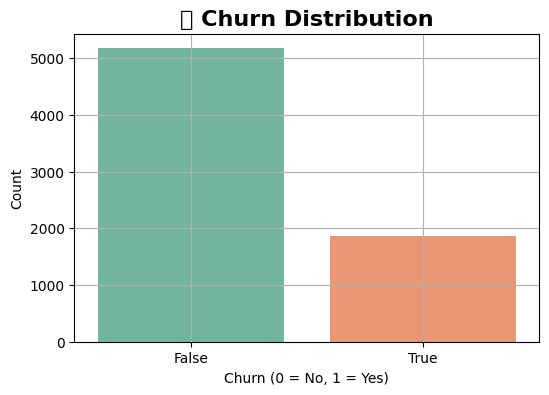

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("🔍 Churn Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# Model Improvement

In [30]:
rf_balanced=RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=42)
rf_balanced.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
y_pred_balanced=rf_balanced.predict(X_test)

In [32]:
accuracy=accuracy_score(y_test,y_pred_balanced)
print(f"Accuracy of mode is {accuracy:.4f}")

Accuracy of mode is 0.7913


In [33]:
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))


🔹 Confusion Matrix:
[[927 108]
 [186 188]]


In [34]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_balanced))


🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Smote

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 2: Apply only on training data (IMPORTANT!)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("after smote: ",y_train_smote)
# Step 3: Check balance after SMOTE
print("🔍 Class Distribution After SMOTE:")
print(y_train_smote.value_counts())


after smote:  0       False
1       False
2       False
3       False
4       False
        ...  
8273     True
8274     True
8275     True
8276     True
8277     True
Name: Churn_Yes, Length: 8278, dtype: bool
🔍 Class Distribution After SMOTE:
Churn_Yes
False    4139
True     4139
Name: count, dtype: int64


In [36]:
# Train Random Forest on SMOTE-balanced data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42) # dont use class_weight="balanced" here because we already balanced the data
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = rf_smote.predict(X_test)

# Evaluation
print(f"\n✅ Accuracy after SMOTE: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_smote))



✅ Accuracy after SMOTE: 0.7637

🔹 Confusion Matrix:
[[841 194]
 [139 235]]

🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      1035
        True       0.55      0.63      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409



In [37]:
# Get predicted probabilities instead of labels
y_proba = rf_model.predict_proba(X_test) # Yeh function probabilities return karta hai class-wise.

[[0.7, 0.3],

 [0.2, 0.8],

 [0.6, 0.4],
 
 ...
]


In [38]:
# Probability of class 1 (Churn_Yes)
y_scores = y_proba[:, 1]  #Yeh slicing hai → iska matlab: Har row ka second column lo (i.e., class 1 ke probabilities)

# Agar yeh binary classification problem hai (like churn: Yes/No), toh yeh return karega:


In [39]:
# Try a custom threshold like 0.4
custom_threshold = 0.4
y_pred_thresh = (y_scores >= custom_threshold).astype(int)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"\n📊 Results for Threshold = {custom_threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))



📊 Results for Threshold = 0.4
Accuracy: 0.7757274662881476
Confusion Matrix:
 [[852 183]
 [133 241]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.82      0.84      1035
        True       0.57      0.64      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



# Finding best Threshold

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# 🔸 Get probabilities for class 1 (Churn_Yes)
y_scores = rf_smote.predict_proba(X_test)[:, 1]

# 🔸 Try thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.91, 0.05) # start, stop, step
f1_scores = []

In [42]:
"""
the range of rthresholds is from 0.1 to 0.9 with a step of 0.05.
# This means the thresholds will be:
[0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 
 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 
 0.80, 0.85, 0.90]
 
 """


'\nthe range of rthresholds is from 0.1 to 0.9 with a step of 0.05.\n# This means the thresholds will be:\n[0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, \n 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, \n 0.80, 0.85, 0.90]\n \n '

In [43]:

for thresh in thresholds:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


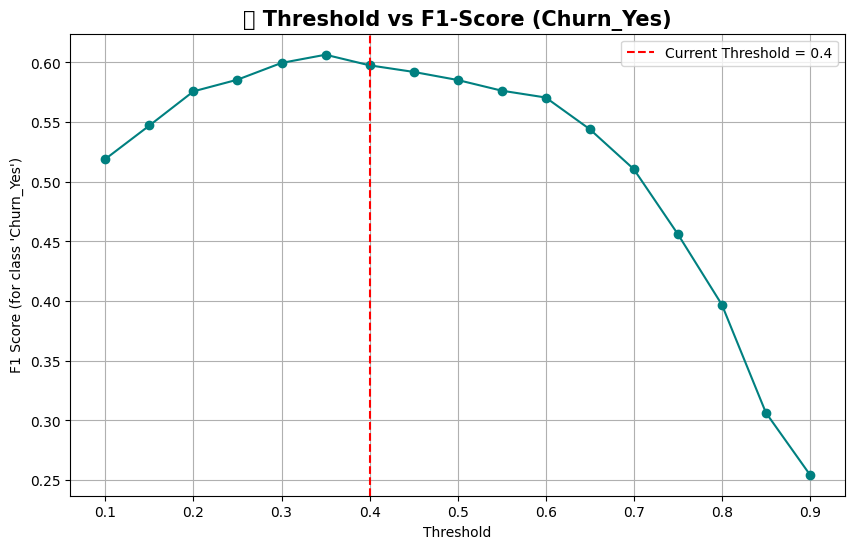

In [44]:
# 🔸 Plotting F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='teal')
plt.title("📈 Threshold vs F1-Score (Churn_Yes)", fontsize=15, fontweight='bold')
plt.xlabel("Threshold")
plt.ylabel("F1 Score (for class 'Churn_Yes')")
plt.grid(True)
plt.axvline(x=0.4, color='red', linestyle='--', label="Current Threshold = 0.4")
plt.legend()
plt.show()


In [45]:
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold = {best_thresh}")


Best Threshold = 0.3500000000000001


In [46]:
y_pred_final = (y_scores >= best_thresh).astype(int)


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# ROC-AUC Score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_scores))  # y_scores hi probability hoti hai class 1 ki


Confusion Matrix:
 [[722 313]
 [ 75 299]]

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.70      0.79      1035
        True       0.49      0.80      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409


ROC-AUC Score: 0.8189361647162158


# Hyperparameters tunning

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param_dist={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[10,20,30,40,50,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2'],
    'class_weight':['balanced',None],
    'criterion':['gini','entropy']
}

In [49]:
rf_base=RandomForestClassifier(random_state=42)
random_search=RandomizedSearchCV(estimator=rf_base,param_distributions=param_dist,n_iter=30,cv=5,verbose=2,n_jobs=-1,random_state=42,scoring='f1')


In [50]:
random_search.fit(X_train_smote,y_train_smote)
print("Best Parameters: ",random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced'}


In [51]:
from sklearn.ensemble import RandomForestClassifier

# 🔸 Train Final Model
rf_final = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

rf_final.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', random_state=42)

In [52]:
y_scores = rf_final.predict_proba(X_test)[:, 1]  # probability of class 1


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


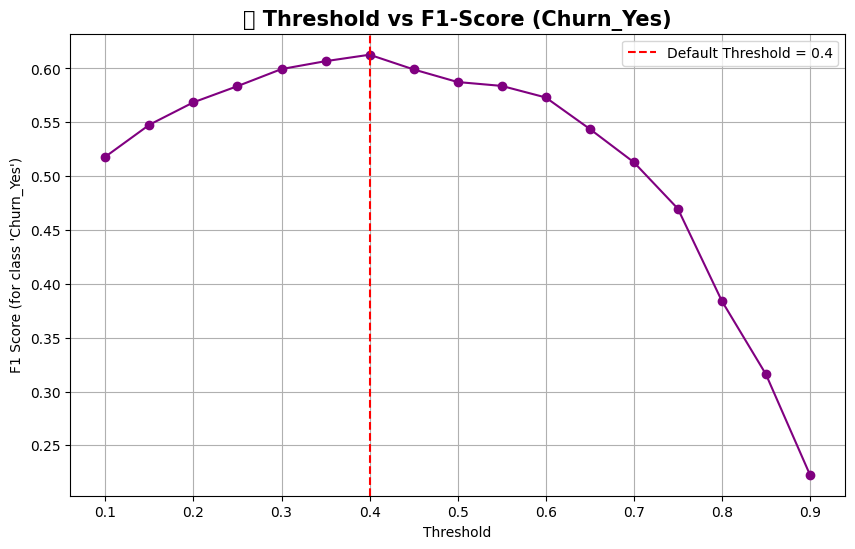

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# 🔸 Get predicted probabilities for class 1 (Churn_Yes)
y_scores = rf_final.predict_proba(X_test)[:, 1]

# 🔸 Thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

# 🔸 Plotting F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='purple')
plt.title("🎯 Threshold vs F1-Score (Churn_Yes)", fontsize=15, fontweight='bold')
plt.xlabel("Threshold")
plt.ylabel("F1 Score (for class 'Churn_Yes')")
plt.grid(True)
plt.axvline(x=0.4, color='red', linestyle='--', label="Default Threshold = 0.4")
plt.legend()
plt.show()


In [54]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# 🔸 Apply best threshold
best_thresh = 0.4
y_pred_final = (y_scores >= best_thresh).astype(int)

# ✅ Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# ✅ Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# ✅ ROC-AUC Score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_scores))  # y_scores = prob of class 1


Confusion Matrix:
 [[762 273]
 [ 89 285]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.74      0.81      1035
        True       0.51      0.76      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409


ROC-AUC Score: 0.8190562918184401
